In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from IPython.display import clear_output
import random

In [423]:
final = np.loadtxt("./datasets-part1/tictac_final.txt")
final_X = final[:,:9] #input features
final_y = final[:,9:].flatten() #output features


final_X_train, final_X_test, final_y_train, final_y_test = train_test_split(
    final_X, final_y, test_size=0.3, random_state=0)

multi = np.loadtxt("./datasets-part1/tictac_multi.txt")
multi_X = multi[:,:9] #input features
multi_y = multi[:,9:] #output features

multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(
    multi_X, multi_y, test_size=0.3, random_state=0)

single = np.loadtxt("./datasets-part1/tictac_single.txt")
single_X = single[:,:9] #input features
single_y = single[:,9:].flatten() #output features

single_X_train, single_X_test, single_y_train, single_y_test = train_test_split(
    single_X, single_y, test_size=0.3, random_state=0)

In [424]:
# checking for uneven data distribution
# we can see that 0 occurs way more than any other number
unique_values, counts = np.unique(single_y, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value} occurs {count} times")

0.0 occurs 1564 times
1.0 occurs 845 times
2.0 occurs 973 times
3.0 occurs 513 times
4.0 occurs 1046 times
5.0 occurs 353 times
6.0 occurs 544 times
7.0 occurs 254 times
8.0 occurs 459 times


In [425]:
zero_occurance = counts[0] / counts.sum()
print(f'{zero_occurance:.2%} of the data is classified as 0')

23.87% of the data is classified as 0


# Classifiers
## Final Board Dataset

In [426]:
def RunClassifiers(X_train, y_train, X_test, y_test):
    
    cv_scores = pd.DataFrame(columns=['SVC', 'KNN', 'MLP'])
    
    models = [
          ('SVC', SVC(kernel='linear')), 
          ('KNN', KNeighborsClassifier()),
          ('MLP', MLPClassifier(hidden_layer_sizes=300,max_iter=1000,solver='lbfgs'))
        ]
    names = []
    
    for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True)
        cv = cross_val_score(model, X_train, y_train, cv=kfold)
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        cm = confusion_matrix(y_test, y_predict)
        names.append(name)
        
        cv_scores[name] = cv
        print(f'Mean Cross Validation Score of {name}: {cv.mean()}')
        
    return cv_scores, models
    

In [427]:
final_CVScores, final_ClassiferModels = RunClassifiers(final_X_train, final_y_train, final_X_test, final_y_test)

Mean Cross Validation Score of SVC: 0.9925373134328359
Mean Cross Validation Score of KNN: 0.9925373134328359
Mean Cross Validation Score of MLP: 0.9925373134328357


In [428]:
def plotConfusionMatrices(Models, X_test, y_test):
    f, axes = plt.subplots(1, len(Models), figsize=(25, 5), sharey='row')
    
    for i, (name, model) in enumerate(Models):
        disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=model.classes_, normalize='true')
        disp.plot(ax=axes[i], xticks_rotation=45)
        disp.ax_.set_title(name)
        disp.im_.colorbar.remove()
        disp.ax_.set_xlabel('')
        if i!=0:
            disp.ax_.set_ylabel('')
    
    f.text(0.425, -0.05, 'Predicted label', ha='left')
    plt.subplots_adjust(wspace=1, hspace=0.2)


    f.colorbar(disp.im_, ax=axes)
    plt.show()
    

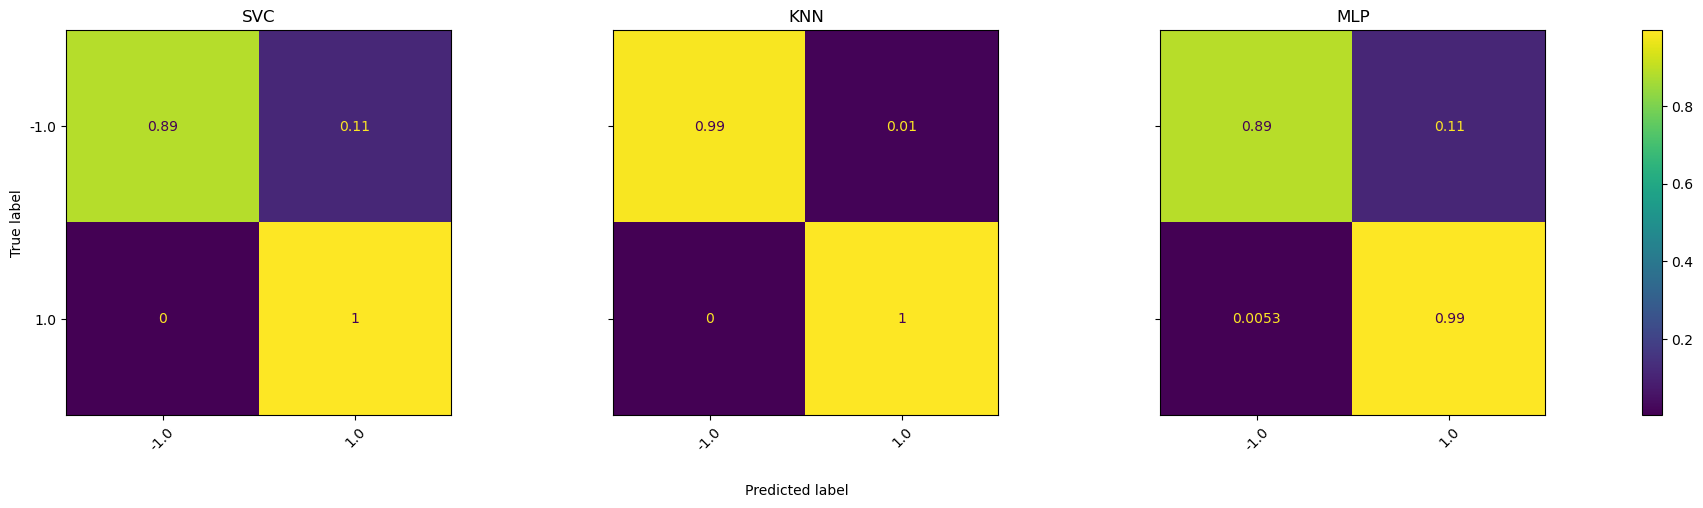

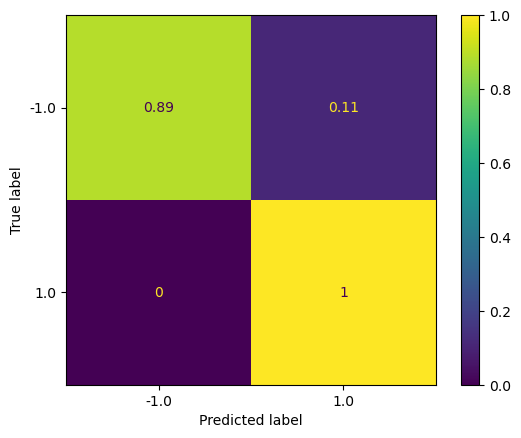

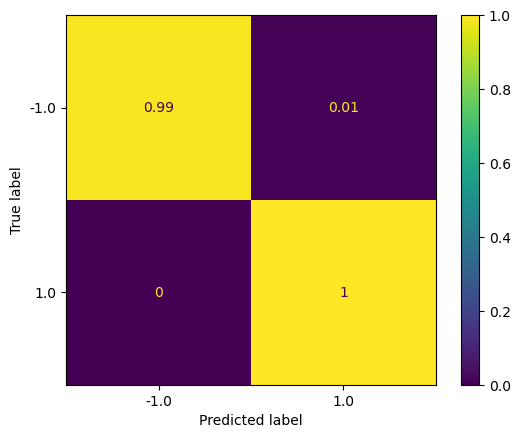

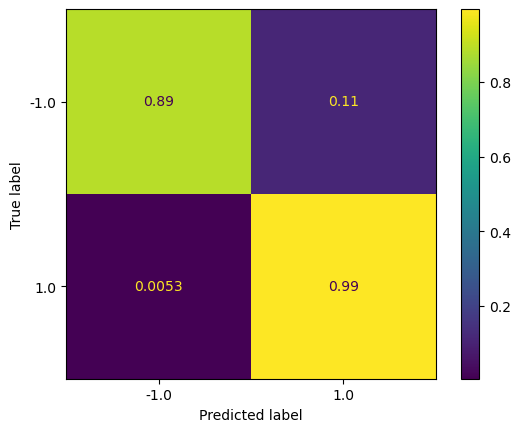

In [429]:
plotConfusionMatrices(final_ClassiferModels, final_X_test, final_y_test)

## Single Label Dataset

In [430]:
single_CVScores, single_ClassifierModels = RunClassifiers(single_X_train, single_y_train, single_X_test, single_y_test)

Mean Cross Validation Score of SVC: 0.3928071277030948
Mean Cross Validation Score of KNN: 0.7147211043563472
Mean Cross Validation Score of MLP: 0.9118836277839618


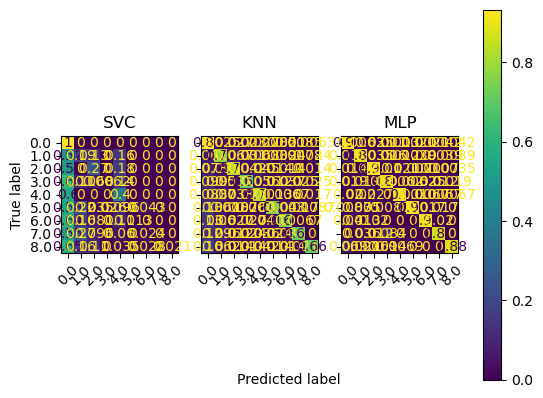

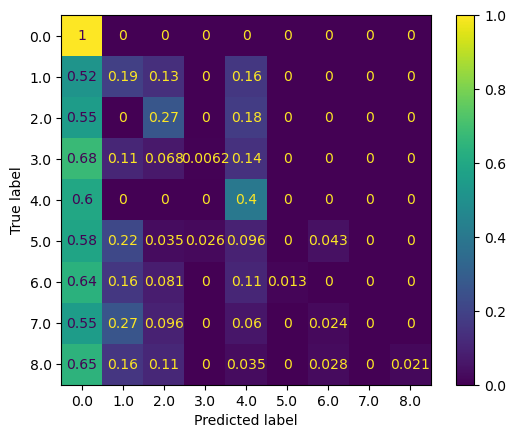

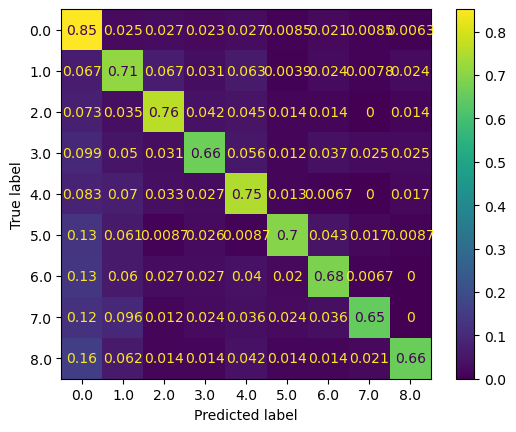

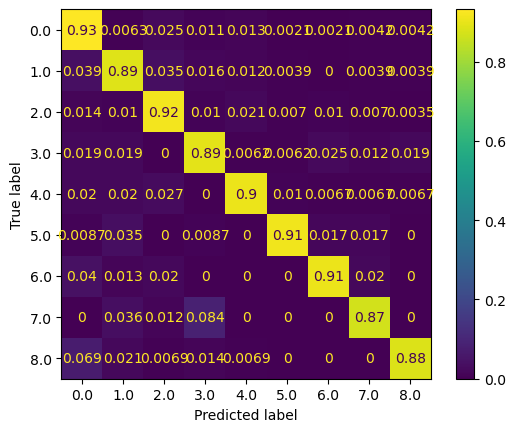

In [61]:
plotConfusionMatrices(single_ClassifierModels, single_X_test, single_y_test)

# Regression

In [383]:
def roundOutput(output):
    for i, arr in enumerate(output):
        for j, val in enumerate(arr):
            if (val > 0.20):
                output[i][j] = 1
            else:
                output[i][j] = 0
    return output

In [450]:
def RunRegressors(X_train, y_train, X_test, y_test):
    
    accuracies = pd.DataFrame(columns=['LRG', 'KNN', 'MLP'])
    models = [
          ('LRG', LinearRegression()), 
          ('KNN', KNeighborsRegressor(n_neighbors=5)),
          ('MLP', MLPRegressor(hidden_layer_sizes=400,max_iter=1000))
        ]
    
    for name, model in models:
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        if(name == 'LRG'):
            y_predict_rounded = roundOutput(y_predict)
        else:
            y_predict_rounded = y_predict.round(0)
        
        score = model.score(X_test, y_test)
        
        accuracies[name] = score
        print(f'Accuracy of {name}: {score}')
        print("--------------------------------")
        
    return accuracies, models
    

In [451]:
multi_acurracies, multi_models = RunRegressors(multi_X_train, multi_y_train, multi_X_test, multi_y_test)

Accuracy of LRG: 0.0012668773294707404
--------------------------------
Accuracy of KNN: 0.5302358234586527
--------------------------------
Accuracy of MLP: 0.6688259592757793
--------------------------------


# TIC-TAC-TOE
reference: https://github.com/NeilCastellino/TicTacToe-in-python

In [355]:
def display_board(board):
    clear_output()
    print('   |   |')
    print(' ' + board[0] + ' | ' + board[1] + ' | ' + board[2])
    print('   |   |')
    print('---|---|---')
    print('   |   |')
    print(' ' + board[3] + ' | ' + board[4] + ' | ' + board[5])
    print('   |   |')
    print('---|---|---')
    print('   |   |')
    print(' ' + board[6] + ' | ' + board[7] + ' | ' + board[8])
    print('   |   |')

In [323]:
def place_marker(board, marker, position):
    board[position] = marker

In [324]:
def win_check(board, mark):
    return ((board[6] == mark and board[7] == mark and board[8] == mark) or 
            (board[3] == mark and board[4] == mark and board[5] == mark) or 
            (board[0] == mark and board[1] == mark and board[2] == mark) or 
            (board[6] == mark and board[3] == mark and board[0] == mark) or
            (board[7] == mark and board[4] == mark and board[1] == mark) or
            (board[8] == mark and board[5] == mark and board[2] == mark) or
            (board[6] == mark and board[4] == mark and board[2] == mark) or
            (board[8] == mark and board[4] == mark and board[0] == mark))

In [325]:
def choose_ai():
    print("Choose which algorithm to play against:")
    print("1. Linear Regression (easy)")
    print("2. K-Nearest Neighbors (medium)")
    print("3. Multilayer Perceptron (hard)\n")
    
    choice = ''
    while(choice not in '1 2 3'.split()):
        choice = input('Select 1, 2, or 3 - ')
        if(choice == '1'):
            computer = multi_models[0][1]
        if(choice == '2'):
            computer = multi_models[1][1]
        if(choice == '3'):
            computer = multi_models[2][1]
        else:
            print('plese select a valid option')
    
    return computer

In [326]:
def choose_first():
    if random.randint(0,1) == 0:
        return 'Player 1'
    else:
        return 'Player 2'

In [353]:
def space_check(board, position):
    return board[position] == ' '

In [344]:
def full_board_check(board):
    for i in range(0,9):
        if space_check(board,i):
            return False
    return True

In [349]:
def player_choice(board, turn):
    position = ' '

    while position not in '1 2 3 4 5 6 7 8 9'.split() or not space_check(board, int(position) - 1):
        position = input(f'{turn}: choose your next position (1-9) ')

    return int(position) - 1

In [330]:
def convert_board(board):
    # converts the board into a format that the model can read
    converted_board = pd.DataFrame(board).replace('X',1).replace('O',-1).replace(' ', 0)
    
    return converted_board

In [362]:
def computer_choice(board, computer):
    
    data_board = convert_board(board).to_numpy().reshape(1,9)
    prediction = computer.predict(data_board)
    position = np.argmax(prediction)
    while(not space_check(board, position)):
       prediction[0][position] = 0
       position = np.argmax(prediction)
    
    
    return position

In [332]:
def replay():
    return input('Do you want to play again? Enter Yes or No - ').lower().startswith('y')

In [433]:
print('Welcome to Tic Tac Toe!')
computer = choose_ai()

while True:
    theBoard = [' ']*9
    player1_marker, player2_marker = ('X', 'O')
    turn = choose_first()
    print(turn + ' will go First')
    
    game_on = True
    
    while game_on:
        if turn == 'Player 1': # HUMAN
            display_board(theBoard)
            position = player_choice(theBoard, turn)
            place_marker(theBoard, player1_marker, position)
            
            if win_check(theBoard, player1_marker):
                display_board(theBoard)
                print('Congratulations!!! \nYou beat the computer.')
                game_on = False
            else:
                if full_board_check(theBoard):
                    display_board(theBoard)
                    print('The game is a DRAW!')
                    break
                else:
                    turn = 'Player 2'
        else: # AI 
            display_board(theBoard)
            position = computer_choice(theBoard, computer)
            place_marker(theBoard, player2_marker, position)
            
            if win_check(theBoard, player2_marker):
                display_board(theBoard)
                print('You lost to a computer :(')
                game_on = False
            else:
                if full_board_check(theBoard):
                    display_board(theBoard)
                    print('The game is a DRAW!')
                    break
                else:
                    turn = 'Player 1'
        
    if not replay():
        break


   |   |
 X | O | O
   |   |
---|---|---
   |   |
 O | O | X
   |   |
---|---|---
   |   |
 X | O | X
   |   |
You lost to a computer :(
Do you want to play again? Enter Yes or No - n
